# Machine Learning with Food Recipes 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import misc
from pylab import rcParams
%matplotlib inline    
    

#### Import Recipes dataset originally from:

    Ahn, Yong-Yeol, et al. "Flavor network and the principles of food pairing." Scientific reports 1 (2011).

In [2]:
recipes = pd.read_csv('C:\Users\RB185092\Desktop\Sowmya_DS_Course\Python\Github Projects\Datasets\Recipes.csv')

### Data Analysis & Data Preparation

In [3]:
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [5]:
recipes.shape

(57691, 384)

In [6]:
list(recipes.columns)

['country',
 'almond',
 'angelica',
 'anise',
 'anise_seed',
 'apple',
 'apple_brandy',
 'apricot',
 'armagnac',
 'artemisia',
 'artichoke',
 'asparagus',
 'avocado',
 'bacon',
 'baked_potato',
 'balm',
 'banana',
 'barley',
 'bartlett_pear',
 'basil',
 'bay',
 'bean',
 'beech',
 'beef',
 'beef_broth',
 'beef_liver',
 'beer',
 'beet',
 'bell_pepper',
 'bergamot',
 'berry',
 'bitter_orange',
 'black_bean',
 'black_currant',
 'black_mustard_seed_oil',
 'black_pepper',
 'black_raspberry',
 'black_sesame_seed',
 'black_tea',
 'blackberry',
 'blackberry_brandy',
 'blue_cheese',
 'blueberry',
 'bone_oil',
 'bourbon_whiskey',
 'brandy',
 'brassica',
 'bread',
 'broccoli',
 'brown_rice',
 'brussels_sprout',
 'buckwheat',
 'butter',
 'buttermilk',
 'cabbage',
 'cabernet_sauvignon_wine',
 'cacao',
 'camembert_cheese',
 'cane_molasses',
 'caraway',
 'cardamom',
 'carnation',
 'carob',
 'carrot',
 'cashew',
 'cassava',
 'catfish',
 'cauliflower',
 'caviar',
 'cayenne',
 'celery',
 'celery_oil',
 '

In [9]:
import re 

searchterm = '.*rice'
print "Items related to Rice:",filter(re.compile(searchterm).match, list(recipes.columns.values))
searchterm = '.*wasabi'
print "Items related to Wasabi:",filter(re.compile(searchterm).match, list(recipes.columns.values))
searchterm = '.*soy'
print "Items related to Soy:",filter(re.compile(searchterm).match, list(recipes.columns.values))

Items related to Rice: ['brown_rice', 'licorice', 'rice']
Items related to Wasabi: ['wasabi']
Items related to Soy: ['soy_sauce', 'soybean', 'soybean_oil']


#### Create a frequency table of Number of recipes 

In [10]:
recipes['country'].value_counts()

American                 40150
Mexico                    1754
Italian                   1715
Italy                     1461
Asian                     1176
French                     996
east_asian                 951
Canada                     774
korean                     767
Mexican                    622
western                    450
Southern_SoulFood          346
India                      324
Jewish                     320
Spanish_Portuguese         291
Mediterranean              289
UK-and-Ireland             282
Indian                     274
France                     268
MiddleEastern              248
Central_SouthAmerican      241
Germany                    237
Eastern-Europe             235
Chinese                    226
Greek                      225
English_Scottish           204
Caribbean                  183
Thai                       164
Scandinavia                158
Cajun_Creole               146
                         ...  
Scandinavian                92
chinese 

### Data Cleansing

#### Merge and rename Identically Named Cuisines 

In [ ]:
recipes.replace(to_replace = "china", value = "chinese", inplace=True)
recipes.replace(to_replace = "france", value = "french", inplace=True)
recipes.replace(to_replace = "germany", value = "german", inplace=True)
recipes.replace(to_replace = "india", value = "indian", inplace=True)
recipes.replace(to_replace = "israel", value = "jewish", inplace=True)
recipes.replace(to_replace = "italy", value = "italian", inplace=True)
recipes.replace(to_replace = "japan", value = "japanese", inplace=True)
recipes.replace(to_replace = "korea", value = "korean", inplace=True)
recipes.replace(to_replace = "mexico", value = "mexican", inplace=True)
recipes.replace(to_replace = "scandinavia", value = "scandinavian", inplace=True)
recipes.replace(to_replace = "thailand", value = "thai", inplace=True)
recipes.replace(to_replace = "vietnam", value = "vietnamese", inplace=True)
recipes['country'] = recipes['country'].str.upper()

In [14]:
before = recipes.shape[0]

threshold = 50 # Anything that occurs less than this will be removed.
value_counts = recipes.stack().value_counts() # Entire DataFrame 
to_remove = value_counts[value_counts < threshold].index
recipes = recipes.loc[~recipes.country.isin(to_remove)]

after = recipes.shape[0]
print before - after, "rows removed."

recipes['country'].value_counts()

288 rows removed.


AMERICAN                   40150
ITALIAN                     3250
MEXICAN                     2390
FRENCH                      1264
ASIAN                       1193
EAST_ASIAN                   951
KOREAN                       799
CANADA                       774
INDIAN                       598
WESTERN                      450
CHINESE                      442
SOUTHERN_SOULFOOD            346
JEWISH                       329
JAPANESE                     320
SPANISH_PORTUGUESE           291
THAI                         289
MEDITERRANEAN                289
GERMAN                       289
UK-AND-IRELAND               282
SCANDINAVIAN                 250
MIDDLEEASTERN                248
CENTRAL_SOUTHAMERICAN        241
EASTERN-EUROPE               235
GREEK                        225
ENGLISH_SCOTTISH             204
CARIBBEAN                    183
CAJUN_CREOLE                 146
EASTERNEUROPEAN_RUSSIAN      146
MOROCCAN                     137
AFRICAN                      115
SOUTHWESTE

In [15]:
recipes[(recipes['rice' ]== "Yes" ) &
   (recipes['soy_sauce']=="Yes") & 
   (recipes['wasabi']== "Yes") &
   (recipes['seaweed']=="Yes")]

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
11306,JAPANESE,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
11321,JAPANESE,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Yes,No,No,No,No,No
11361,JAPANESE,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
12171,ASIAN,No,No,No,No,No,No,No,No,No,...,No,No,No,No,Yes,No,No,No,No,No
12385,ASIAN,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
13010,ASIAN,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
13159,ASIAN,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
13513,JAPANESE,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
13586,JAPANESE,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
13625,EAST_ASIAN,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [16]:
CountIngredients=(recipes=='Yes').sum().sort_values(ascending=False)
CountIngredients

egg                 21025
wheat               20781
butter              20719
onion               18080
garlic              17353
milk                12870
vegetable_oil       11105
cream               10171
tomato               9920
olive_oil            9876
black_pepper         9828
pepper               9230
vanilla              9010
cayenne              8254
vinegar              8060
cane_molasses        7741
bell_pepper          5979
cinnamon             5594
parsley              5552
chicken              5436
lemon_juice          5065
beef                 4902
corn                 4828
cocoa                4799
scallion             4782
bread                4571
ginger               4358
mustard              4119
rice                 3857
basil                3842
                    ...  
mutton                  3
hop                     3
carnation               3
holy_basil              3
jasmine_tea             2
soybean_oil             2
strawberry_juice        2
laurel      

In [17]:
by_country_norm = (recipes=='Yes').groupby(recipes['country']).mean()

by_country_norm

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
country,,,,,,,,,,,,,,,,,,,,,
AFRICAN,0.0,0.156522,0.000000,0.000000,0.000000,0.034783,0.000000,0.069565,0.000000,0.000000,...,0.000000,0.008696,0.043478,0.008696,0.017391,0.000000,0.008696,0.017391,0.000000,0.034783
AMERICAN,0.0,0.040598,0.000025,0.003014,0.000573,0.052055,0.000623,0.011308,0.000100,0.000000,...,0.002964,0.006874,0.030809,0.014819,0.011009,0.000672,0.001445,0.068219,0.016912,0.018630
ASIAN,0.0,0.007544,0.000000,0.000838,0.002515,0.012573,0.000000,0.005029,0.000000,0.000000,...,0.000838,0.001676,0.038558,0.001676,0.124895,0.000000,0.001676,0.004191,0.010897,0.011735
CAJUN_CREOLE,0.0,0.000000,0.000000,0.000000,0.000000,0.006849,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.006849,0.082192,0.000000,0.191781,0.000000,0.006849,0.034247,0.006849,0.000000
CANADA,0.0,0.036176,0.000000,0.000000,0.000000,0.036176,0.000000,0.002584,0.000000,0.000000,...,0.002584,0.003876,0.029716,0.020672,0.003876,0.000000,0.001292,0.067183,0.019380,0.011628
CARIBBEAN,0.0,0.016393,0.000000,0.010929,0.000000,0.010929,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.060109,0.005464,0.000000,0.000000,0.000000,0.027322,0.010929,0.016393
CENTRAL_SOUTHAMERICAN,0.0,0.053942,0.000000,0.000000,0.020747,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004149,0.020747,0.000000,0.008299,0.000000,0.000000,0.029046,0.004149,0.016598
CHINESE,0.0,0.024887,0.000000,0.000000,0.009050,0.004525,0.000000,0.006787,0.000000,0.000000,...,0.000000,0.000000,0.029412,0.002262,0.183258,0.000000,0.000000,0.015837,0.002262,0.000000
EASTERN-EUROPE,0.0,0.025532,0.000000,0.004255,0.000000,0.029787,0.000000,0.025532,0.000000,0.000000,...,0.017021,0.012766,0.012766,0.004255,0.000000,0.000000,0.000000,0.157447,0.004255,0.000000


In [20]:
Country_name = "CANADA" #try: italian

by_country_norm.loc[Country_name].sort_values( ascending=False)

wheat               0.395349
butter              0.381137
egg                 0.354005
onion               0.343669
garlic              0.270026
milk                0.264858
black_pepper        0.209302
cane_molasses       0.205426
vegetable_oil       0.187339
pepper              0.183463
vanilla             0.178295
tomato              0.170543
vinegar             0.156331
cream               0.151163
olive_oil           0.124031
chicken             0.108527
cayenne             0.108527
cinnamon            0.105943
bell_pepper         0.100775
potato              0.094315
cocoa               0.089147
lemon_juice         0.087855
beef                0.086563
mustard             0.085271
parsley             0.081395
celery              0.080103
soy_sauce           0.073643
carrot              0.073643
lard                0.073643
bread               0.071059
                      ...   
emmental_cheese     0.000000
elderberry          0.000000
eel                 0.000000
durian        

In [21]:
Country_name = "ITALIAN" 

by_country_norm.loc[Country_name].sort_values( ascending=False)

olive_oil            0.606154
garlic               0.525846
tomato               0.392308
onion                0.326769
basil                0.312000
parmesan_cheese      0.302769
macaroni             0.283077
egg                  0.269231
butter               0.267692
black_pepper         0.266462
wheat                0.258769
parsley              0.240308
cheese               0.184615
oregano              0.161538
bell_pepper          0.157231
cream                0.142769
milk                 0.131077
mozzarella_cheese    0.127077
white_wine           0.118769
bread                0.116000
pepper               0.114154
chicken_broth        0.101231
rosemary             0.098462
mushroom             0.093846
thyme                0.092923
lemon_juice          0.084923
beef                 0.083385
chicken              0.080923
fennel               0.079077
olive                0.074154
                       ...   
frankfurter          0.000000
enokidake            0.000000
emmental_c

In [22]:
NameofRegion = by_country_norm.index.get_values();


for Region in NameofRegion:
    print Region
    print by_country_norm.loc[Region].sort_values( ascending=False).ix[0:5] 
    print "\n"

AFRICAN
onion        0.530435
olive_oil    0.521739
garlic       0.495652
cumin        0.426087
cayenne      0.356522
Name: AFRICAN, dtype: float64


AMERICAN
butter    0.411582
egg       0.405131
wheat     0.398406
onion     0.293325
milk      0.266002
Name: AMERICAN, dtype: float64


ASIAN
soy_sauce    0.496228
ginger       0.486169
garlic       0.479464
rice         0.413244
scallion     0.382230
Name: ASIAN, dtype: float64


CAJUN_CREOLE
onion          0.698630
cayenne        0.561644
garlic         0.486301
butter         0.363014
bell_pepper    0.342466
Name: CAJUN_CREOLE, dtype: float64


CANADA
wheat     0.395349
butter    0.381137
egg       0.354005
onion     0.343669
garlic    0.270026
Name: CANADA, dtype: float64


CARIBBEAN
onion            0.513661
garlic           0.508197
black_pepper     0.311475
vegetable_oil    0.311475
tomato           0.300546
Name: CARIBBEAN, dtype: float64


CENTRAL_SOUTHAMERICAN
garlic     0.568465
onion      0.543568
cayenne    0.518672
tomato  

In [23]:
from sklearn.cluster import KMeans

In [24]:
n_cluster = 9
y_pred = KMeans(n_clusters = n_cluster, random_state=0).fit_predict(by_country_norm)
for i in range(0,n_cluster):
    print "Cluster number "+str(i) +"----------------------------------------------------------------------------"
    print list(by_country_norm[y_pred==i].index)
    print ""

Cluster number 0----------------------------------------------------------------------------
['CENTRAL_SOUTHAMERICAN', 'MEXICAN', 'SOUTHWESTERN']

Cluster number 1----------------------------------------------------------------------------
['AMERICAN', 'CANADA', 'EASTERN-EUROPE', 'EASTERNEUROPEAN_RUSSIAN', 'ENGLISH_SCOTTISH', 'FRENCH', 'GERMAN', 'IRISH', 'JEWISH', 'SCANDINAVIAN', 'SOUTHERN_SOULFOOD', 'UK-AND-IRELAND', 'WESTERN']

Cluster number 2----------------------------------------------------------------------------
['ASIAN', 'JAPANESE']

Cluster number 3----------------------------------------------------------------------------
['AFRICAN', 'INDIAN', 'MIDDLEEASTERN', 'MOROCCAN', 'NORTH-AFRICAN']

Cluster number 4----------------------------------------------------------------------------
['GREEK', 'ITALIAN', 'MEDITERRANEAN']

Cluster number 5----------------------------------------------------------------------------
['CHINESE', 'EAST_ASIAN', 'KOREAN']

Cluster number 6----------

In [25]:
#import sklearn.cross_validation as cv
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

In [26]:
recipes.replace(to_replace='No', value=0, inplace=True)
recipes.replace(to_replace='Yes', value=1, inplace=True)

In [27]:
y = recipes['country']
X = recipes.ix[:,1:]
Tree = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=20,min_samples_leaf=100)
Tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=100,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [28]:
!pip install pydotplus

  Running setup.py bdist_wheel for pydotplus: started
  Running setup.py bdist_wheel for pydotplus: finished with status 'done'
  Stored in directory: C:\Users\RB185092\AppData\Local\pip\Cache\wheels\43\31\48\e1d60511537b50a8ec28b130566d2fbbe4ac302b0def4baa48
Successfully built pydotplus


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [31]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg


#### Analyse and Evaluate Model Performance by Creating Groups 

In [42]:
European_Group = ["italian","french","german",  "spanish_portuguese","mediterranean","scandinavian","greek"]
Newdata=recipes[recipes.country.isin(map(str.upper,European_Group))]
y=Newdata['country']
X=Newdata.ix[:,1:]
olive_tree = tree.DecisionTreeClassifier(max_depth=3)
olive_tree= olive_tree.fit(X, y)

In [30]:
Asian_Countries = ["KOREAN","JAPANESE","CHINESE","THAI","INDIAN"]
Newdata = recipes[recipes.country.isin(Asian_Countries)]
y = Newdata['country']
X = Newdata.ix[:,1:]
bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [43]:
bamboo = recipes[recipes.country.isin(Asian_Countries)] 

In [44]:
bamboo['country'].value_counts()

KOREAN      799
INDIAN      598
CHINESE     442
JAPANESE    320
THAI        289
Name: country, dtype: int64

In [45]:
import random
Nsamples=100
random.seed(99)

msk = np.random.rand(len(bamboo)) < 0.7
Traindf = bamboo[msk]
Testdf = bamboo[~msk]

In [48]:
#Training dataset 
print "original Dataset Counts :\n",bamboo['country'].value_counts()
print "\nTraining Dataset Counts :\n ",Traindf['country'].value_counts()
print "\nTest Dataset Counts :\n ",Testdf['country'].value_counts()

original Dataset Counts :
KOREAN      799
INDIAN      598
CHINESE     442
JAPANESE    320
THAI        289
Name: country, dtype: int64

Training Dataset Counts :
  KOREAN      548
INDIAN      420
CHINESE     302
JAPANESE    233
THAI        202
Name: country, dtype: int64

Test Dataset Counts :
  KOREAN      251
INDIAN      178
CHINESE     140
JAPANESE     87
THAI         87
Name: country, dtype: int64


In [49]:
y_train=Traindf['country']
X_train=Traindf.ix[:,1:]

y_test=Testdf['country']
X_test=Testdf.ix[:,1:]

In [50]:
bamboo_tree_pred = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree_pred.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [51]:
y_pred=bamboo_tree_pred.predict(X_test)

#### Create Confusion Matrix for Evaluation of the Model

In [54]:
import matplotlib.ticker as ticker

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Reds, labels=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # I also added cmap=cmap here, to make use of the 
    # colormap you specify in the function call
    cax = ax.matshow(cm,cmap=cmap)
    plt.title(title)
    fig.colorbar(cax)
    if labels:
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.xlabel('True')
    plt.ylabel('Predicted')

array([[ 48,   1,   2,  16,   3],
       [  0, 103,   0,   0,   9],
       [  0,   0,   0,   0,   0],
       [ 92,  70,  84, 234,  58],
       [  0,   4,   1,   1,  17]])

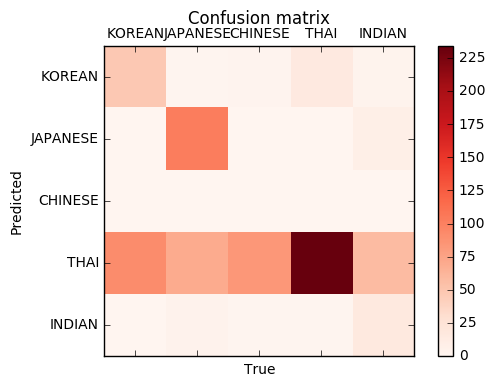

In [55]:
labels = Asian_Countries
cm = confusion_matrix(y_pred,y_test)
plot_confusion_matrix(cm, labels=labels)
cm